In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import datetime

In [2]:
# obtain the exchage rate data from AKShare, which is an elegant and simple financial data interface library for Python
# using the API below, to access history trading data from the following website
# http://biz.finance.sina.com.cn/forex/forex.php?startdate=2012-01-01&enddate=2021-06-14&money_code=EUR&type=0
exchange_rate_orign_df = ak.currency_boc_sina(symbol="加拿大元", start_date="20190101", end_date="20231115")

In [3]:
# Select data which I interested in and rename the columns of dataframe
exchange_rates = exchange_rate_orign_df[['日期','中行钞卖价/汇卖价', '中行汇买价']].rename(
        columns={
            "日期": "date", # type: datetime.dat
            "中行钞卖价/汇卖价": "bank_selling_exchange_rate", # The amount of Chinese currency that Bank of China willing to sell 100 CAD$ to you
            '中行汇买价':"bank_buying_exchange_rate" # The amount of Chinese currency that Bank of China is willing to buy 100 CAD$ from you
            }
        )

In [4]:
exchange_rates.set_index(exchange_rates['date'], inplace=True)
exchange_rates

,date,bank_selling_exchange_rate,bank_buying_exchange_rate
date,,,
2019-01-01,2019-01-01,505.91,502.21
2019-01-02,2019-01-02,505.35,501.65
2019-01-03,2019-01-03,510.20,506.46
2019-01-04,2019-01-04,511.09,507.35
2019-01-07,2019-01-07,515.00,511.23
...,...,...,...
2023-11-09,2023-11-09,531.69,528.15
2023-11-10,2023-11-10,528.62,525.10
2023-11-13,2023-11-13,530.17,526.64


In [5]:
selling_rates = exchange_rates['bank_buying_exchange_rate']
selling_rates.index = pd.to_datetime(selling_rates.index)

selling_rates

date
2019-01-01    502.21
2019-01-02    501.65
2019-01-03    506.46
2019-01-04    507.35
2019-01-07    511.23
               ...  
2023-11-09    528.15
2023-11-10    525.10
2023-11-13    526.64
2023-11-14    526.79
2023-11-15    528.93
Name: bank_buying_exchange_rate, Length: 1270, dtype: float64

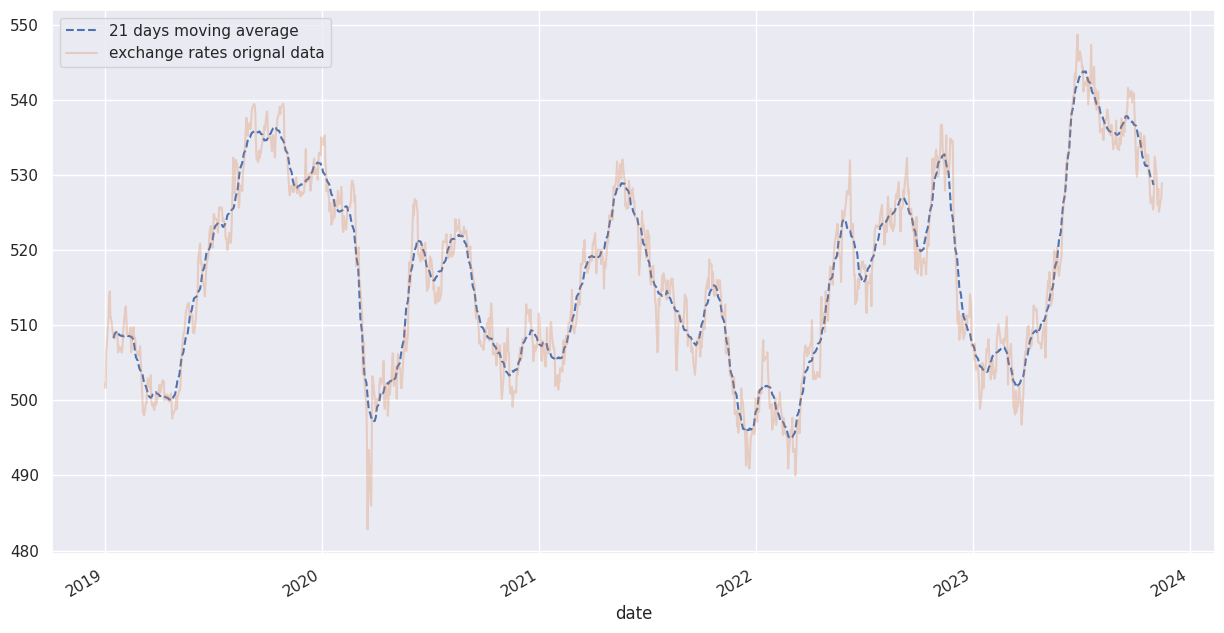

In [29]:
window = 21
selling_rates.rolling(window, center=True).mean().plot(style='--', label=f'{window} days moving average', figsize=(15, 8))
selling_rates.plot(alpha=0.3, style='-', label = 'exchange rates orignal data')
plt.legend()

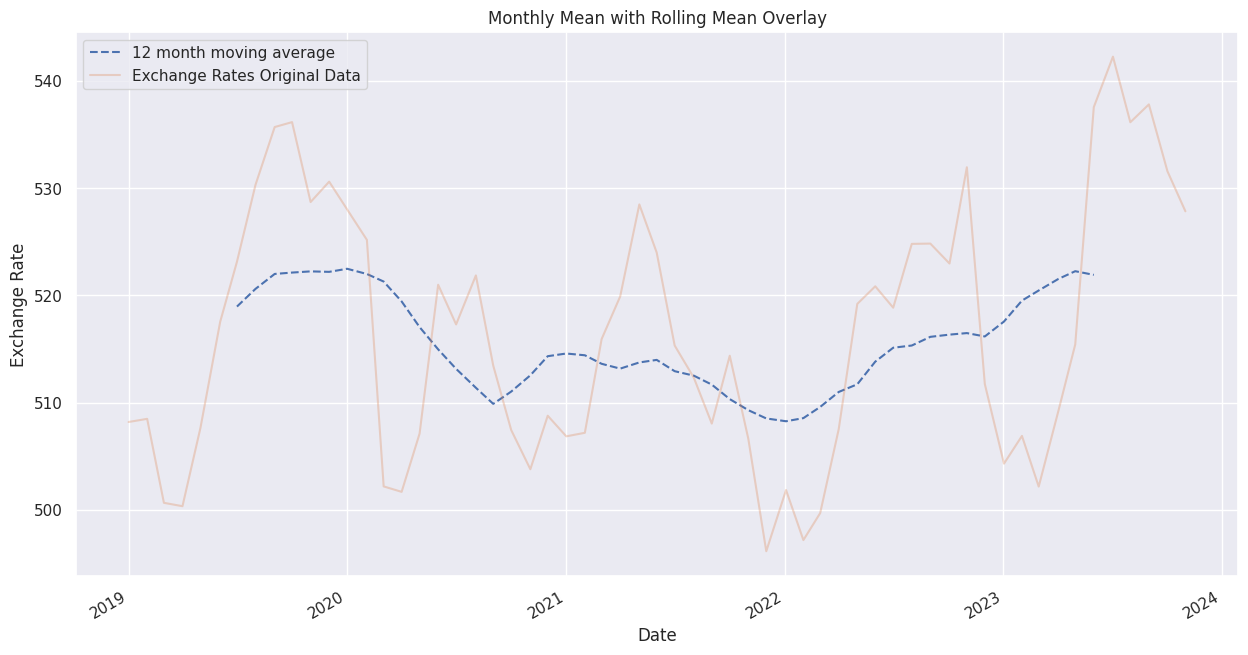

In [65]:
plt.figure(figsize=(15, 8))
selling_rates.resample('BMS').mean().rolling(window=12, center=True).mean().plot(style='--', label=f'12 month moving average')
selling_rates.resample('BMS').mean().plot(alpha=0.3, style='-', label = 'Exchange Rates Original Data')

plt.title('Monthly Mean with Rolling Mean Overlay')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [8]:
help(selling_rates.rolling)

Help on method rolling in module pandas.core.generic:

rolling(window: 'int | dt.timedelta | str | BaseOffset | BaseIndexer', min_periods: 'int | None' = None, center: 'bool_t' = False, win_type: 'str | None' = None, on: 'str | None' = None, axis: 'Axis | lib.NoDefault' = <no_default>, closed: 'IntervalClosedType | None' = None, step: 'int | None' = None, method: 'str' = 'single') -> 'Window | Rolling' method of pandas.core.series.Series instance
    Provide rolling window calculations.

    Parameters
    ----------
    window : int, timedelta, str, offset, or BaseIndexer subclass
        Size of the moving window.

        If an integer, the fixed number of observations used for
        each window.

        If a timedelta, str, or offset, the time period of each window. Each
        window will be a variable sized based on the observations included in
        the time-period. This is only valid for datetimelike indexes.
        To learn more about the offsets & frequency strings, pl

In [69]:
mpl.rcParams.update({
    'figure.figsize': [15, 8]
})

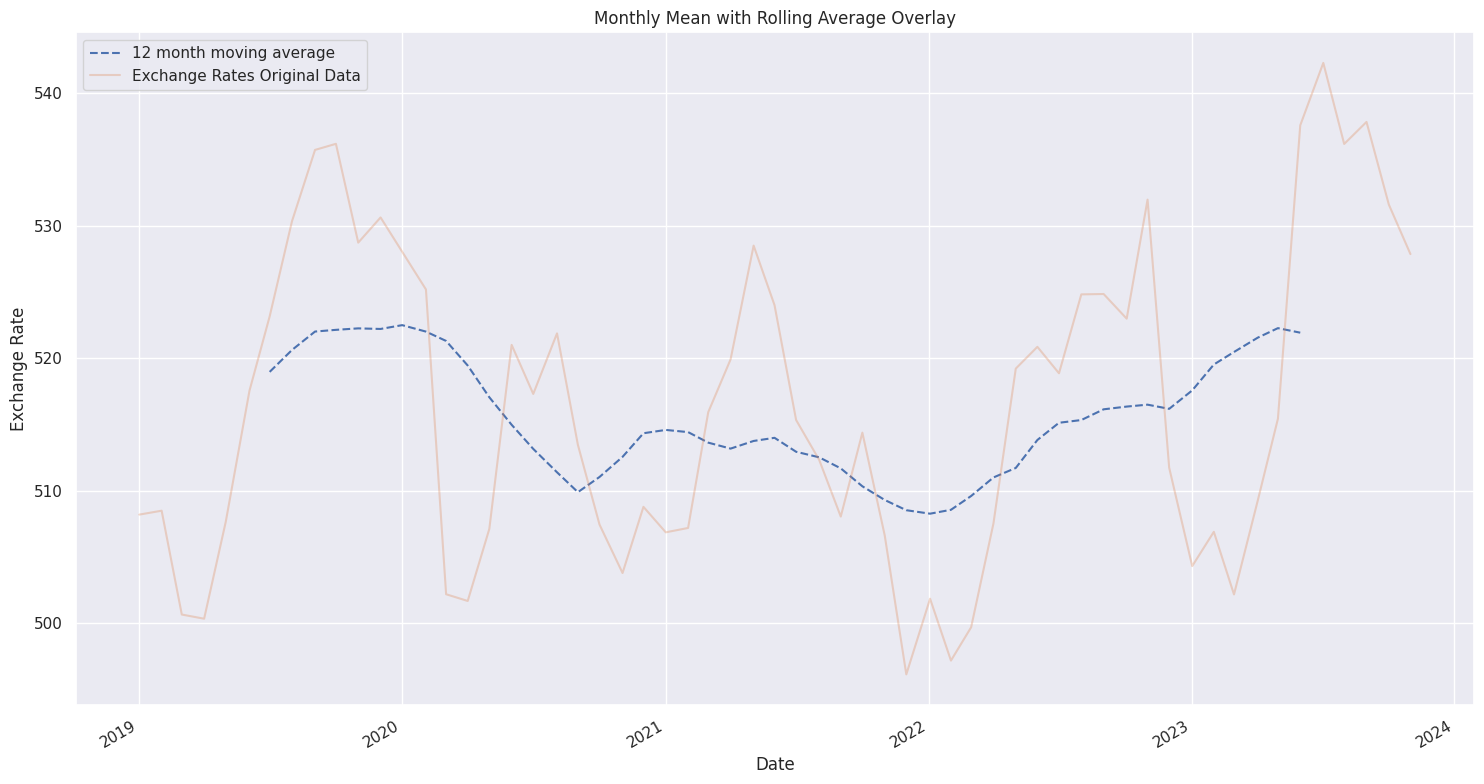

In [76]:
selling_rates.resample('BMS').mean().rolling(window=12, center=True).mean().plot(style='--', label=f'12 month moving average')
selling_rates.resample('BMS').mean().plot(alpha=0.3, style='-', label = 'Exchange Rates Original Data')

plt.title('Monthly Mean with Rolling Average Overlay')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.tight_layout()
plt.show()

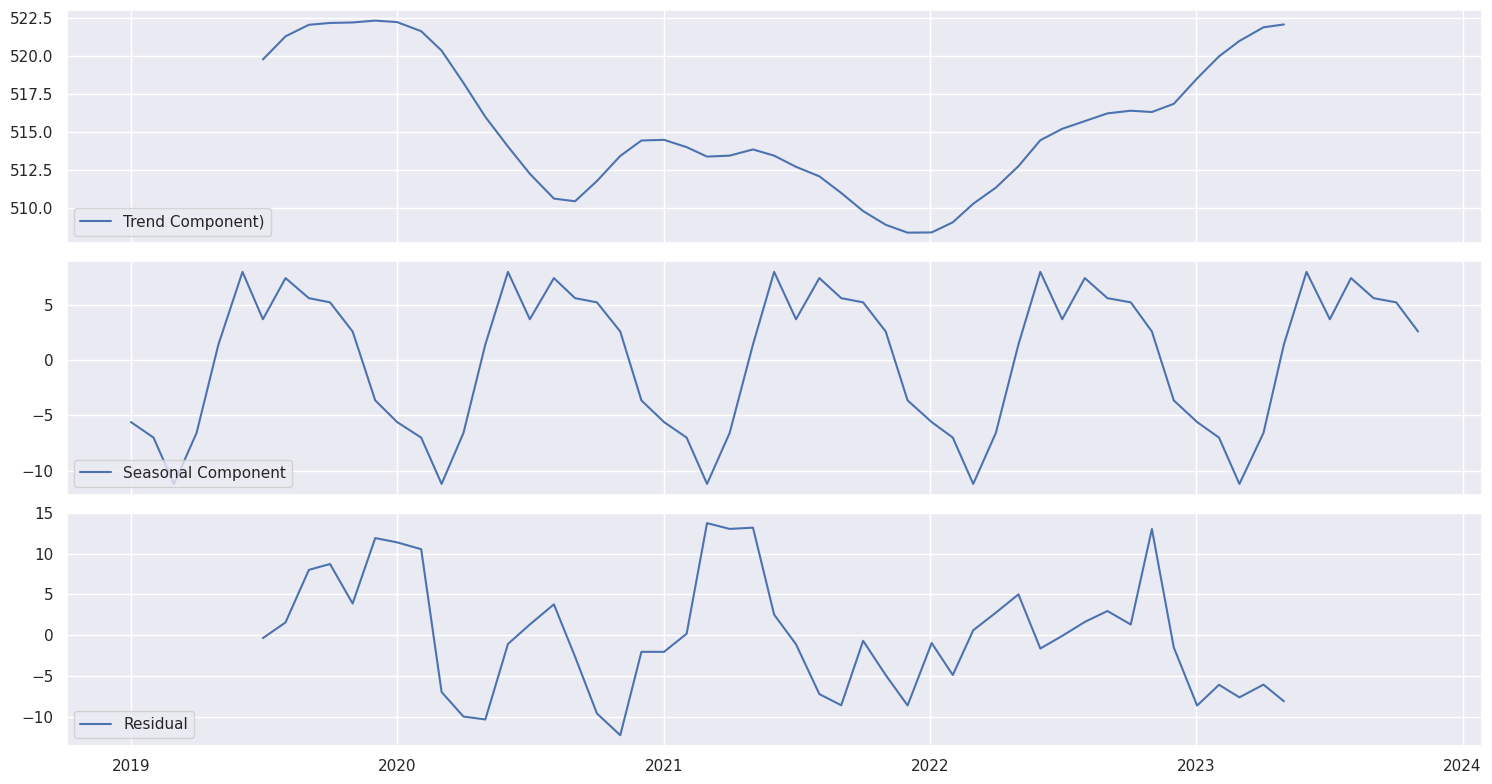

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(selling_rates.resample('BMS').mean(), model='additive', period=12)

# Plotting
fig, axs = plt.subplots(3, 1, sharex=True)

# Trend component from seasonal decomposition
axs[0].plot(result.trend, label='Trend Component)')
axs[0].legend(loc='lower left') 

# Seasonal component
axs[1].plot(result.seasonal, label='Seasonal Component')
axs[1].legend(loc='lower left')

axs[2].plot(result.resid, label='Residual')
axs[2].legend(loc='lower left')
plt.tight_layout()
plt.show()


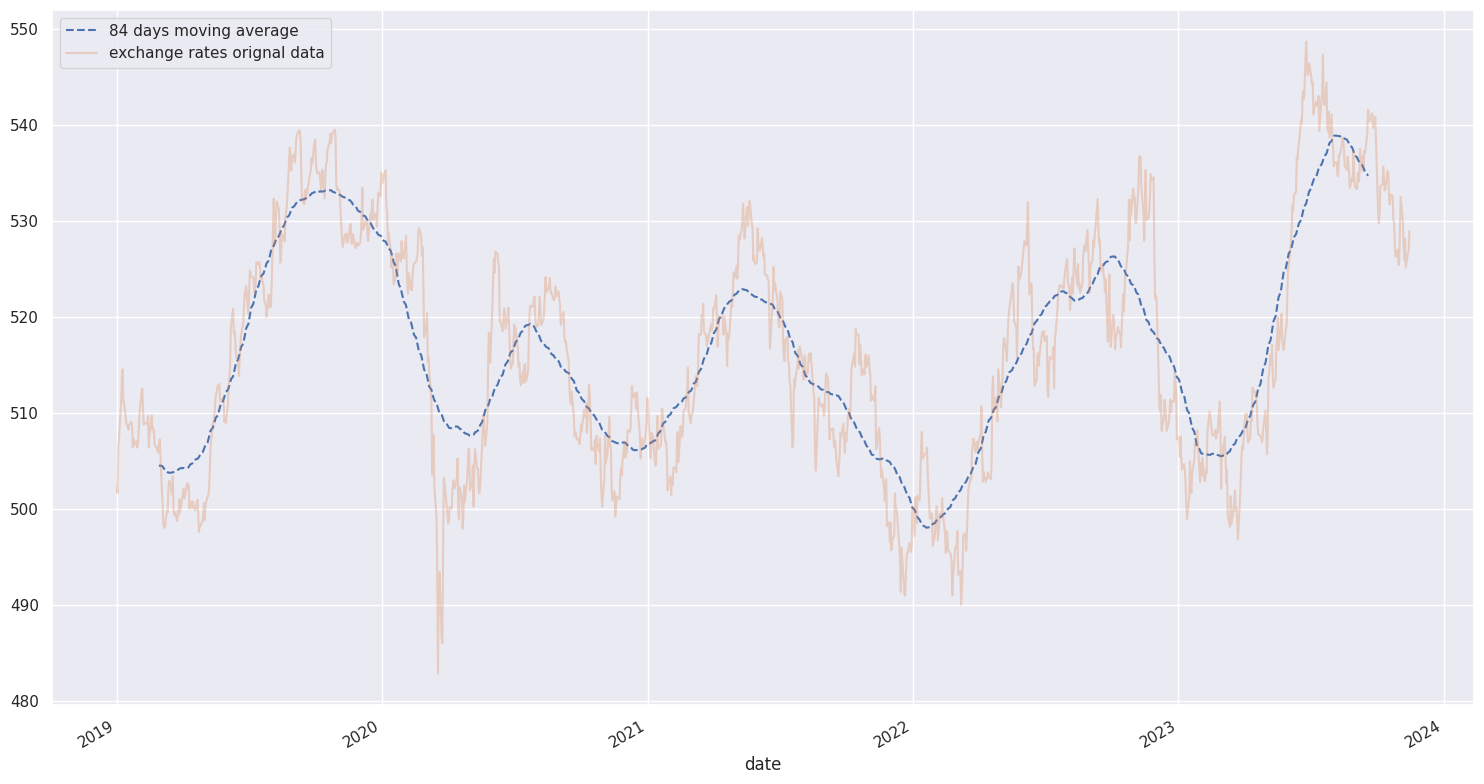

In [79]:
window = 21*4
selling_rates.rolling(window, center=True).mean().plot(style='--', label=f'{window} days moving average', figsize=(15, 8))
selling_rates.plot(alpha=0.3, style='-', label = 'exchange rates orignal data')
plt.tight_layout()
plt.legend()

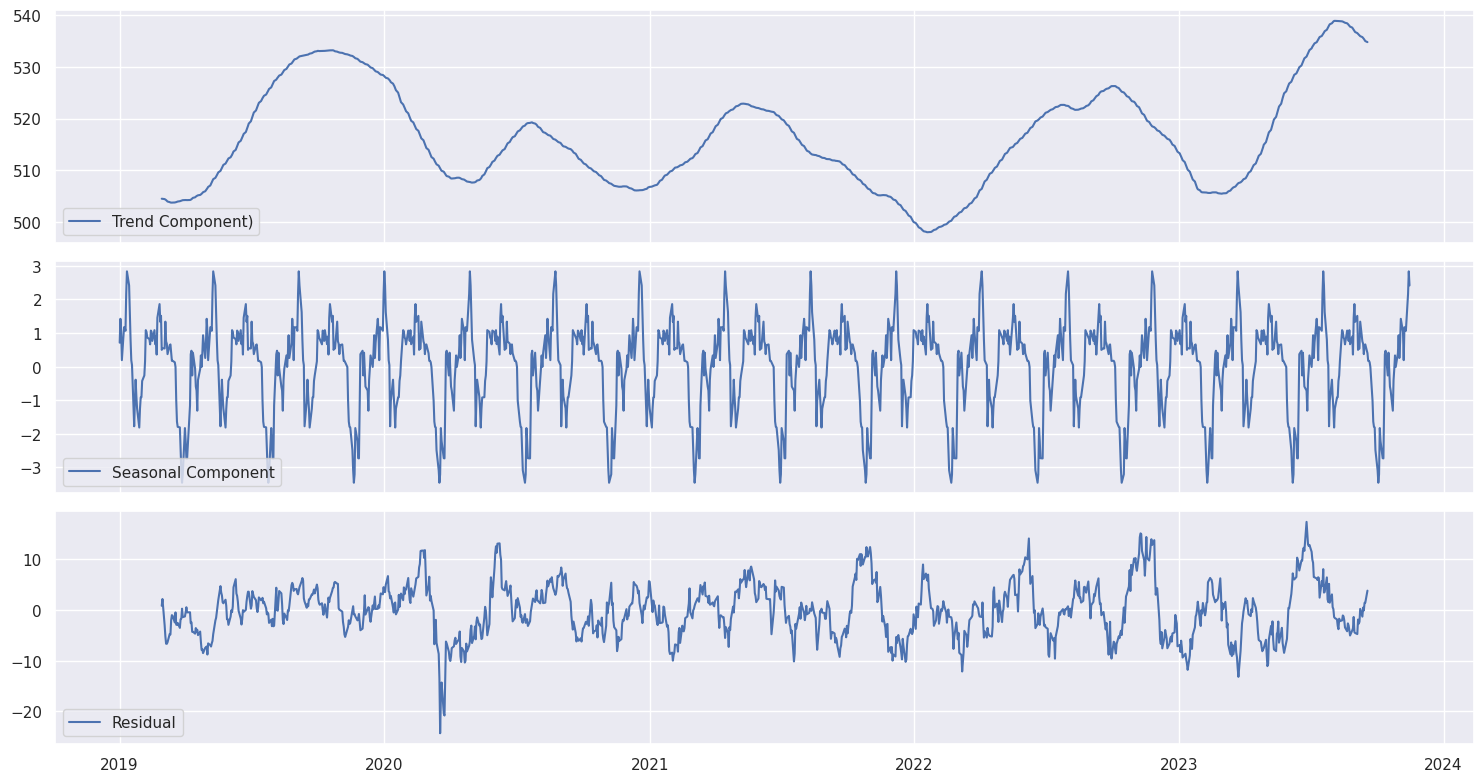

In [80]:
result = seasonal_decompose(selling_rates, model='additive', period=window)

# Plotting
fig, axs = plt.subplots(3, 1, sharex=True)

# Trend component from seasonal decomposition
axs[0].plot(result.trend, label='Trend Component)')
axs[0].legend(loc='lower left') 

# Seasonal component
axs[1].plot(result.seasonal, label='Seasonal Component')
axs[1].legend(loc='lower left')

axs[2].plot(result.resid, label='Residual')
axs[2].legend(loc='lower left')
plt.tight_layout()
plt.show()
